###**Import Libraries**

In [ ]:
#import libraries
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection,naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

###**Upload the file**

In [ ]:
#allow access to Google Drive
drive.mount('/content/gdrive')

#uplaods the file
clean_data = pd.read_csv('gdrive/My Drive/News/clean_data.csv', delimiter=',')

#see 5 first rows
clean_data.head(5)

Mounted at /content/gdrive


,Unnamed: 0,section,abstract,body,caption,headline,raw_body,final_text
0,0,Health,The tobacco and vaping industries and conserva...,"['the', 'trump', 'administration', 'is', 'expe...",A new study by the National Institute on Drug ...,F.D.A. Plans to Ban Most E-Cigarette Flavors b...,The Trump administration is expected to announ...,"['trump', 'administration', 'expect', 'announc..."
1,1,Science,"All year long, Earth passes through streams of...","['all', 'year', 'long', 'as', 'earth', 'revolv...","Perseid meteors named as ""Orinoid"" streak acro...",Meteor Showers in 2020 That Will Light Up Nigh...,All year long as Earth revolves around the sun...,"['year', 'long', 'earth', 'revolve', 'around',..."
2,2,Science,A year full of highs and lows in space just en...,"['if', 'you', 'follow', 'space', 'news', 'and'...",Spectators viewing the launch of a Soyuz rocke...,"Rocket Launches, Trips to Mars and More 2020 S...","If you follow space news and astronomy, the pa...","['follow', 'space', 'news', 'astronomy', 'past..."
3,3,Television,"""Linda Ronstadt: The Sound of My Voice"" airs o...","['linda', 'ronstadt', ':', 'the', 'sound', 'of...","Linda Ronstadt in ""Linda Ronstadt: The Sound o...",What's on TV Wednesday: A Linda Ronstadt Doc a...,LINDA RONSTADT: THE SOUND OF MY VOICE (2019) 9...,"['linda', 'ronstadt', 'sound', 'voice', 'cnn',..."
4,4,Travel,Interested in the southernmost continent? Here...,"['as', 'the', 'number', 'of', 'travelers', 'cr...","Antarctica21&rsquo;s expedition ship, Ocean No...",New Cruise Ships to Set Sail for Antarctica,As the number of travelers cruising Antarctica...,"['number', 'traveler', 'cruise', 'antarctica',..."


###**EDA**

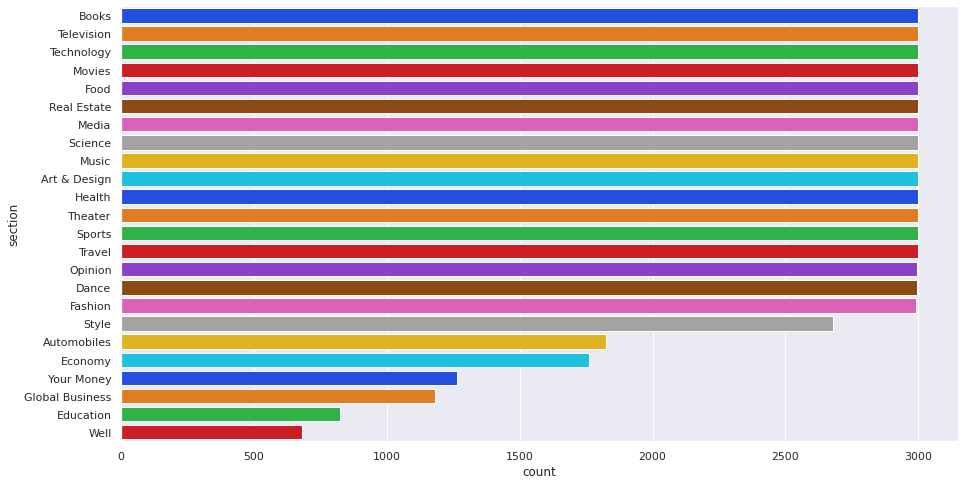

In [ ]:
#defines graph size
sns.set(rc = {'figure.figsize':(15,8)})

#plots the number of articles per category
ax = sns.countplot(y="section", data=clean_data, palette="bright", order = clean_data['section'].value_counts().index)

###**Test / Training Data**

In [ ]:
#splits the data into test and training
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(clean_data['final_text'],clean_data['section'],test_size=0.2)

#encoding the labels
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

#tfidf vectors
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(clean_data['final_text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

#prints the labels
integer_mapping = {l: i for i, l in enumerate(Encoder.classes_)}
print(integer_mapping)

#set the seed
rng = np.random.default_rng(2021)
rng.random(4)

{'Art & Design': 0, 'Automobiles': 1, 'Books': 2, 'Dance': 3, 'Economy': 4, 'Education': 5, 'Fashion': 6, 'Food': 7, 'Global Business': 8, 'Health': 9, 'Media': 10, 'Movies': 11, 'Music': 12, 'Opinion': 13, 'Real Estate': 14, 'Science': 15, 'Sports': 16, 'Style': 17, 'Technology': 18, 'Television': 19, 'Theater': 20, 'Travel': 21, 'Well': 22, 'Your Money': 23}


array([0.75694783, 0.94138187, 0.59246304, 0.31884171])

###**Multinomial Naive Bayes**

In [ ]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB(alpha=1.0,fit_prior=True)
Naive.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

# print metrics
print(classification_report(Test_Y, predictions_NB))

#creates dataframe
Naive_report = classification_report(Test_Y, predictions_NB, output_dict=True)
data_naive = pd.DataFrame(Naive_report).transpose()

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       621
           1       0.93      0.89      0.91       350
           2       0.73      0.76      0.74       620
           3       0.93      0.95      0.94       583
           4       0.81      0.86      0.83       325
           5       0.83      0.77      0.80       167
           6       0.71      0.72      0.71       613
           7       0.82      0.90      0.86       597
           8       0.88      0.79      0.83       225
           9       0.68      0.89      0.77       545
          10       0.75      0.78      0.76       615
          11       0.79      0.76      0.78       600
          12       0.86      0.88      0.87       595
          13       0.72      0.69      0.70       578
          14       0.86      0.90      0.88       625
          15       0.85      0.81      0.83       625
          16       0.87      0.95      0.91       582
          17       0.47    

###**Gaussian Naive Bayes**

In [ ]:
# fit the training dataset on Gaussian Naive Bayes Classifier
Gaussian_N = GaussianNB()
Gaussian_N.fit(Train_X_Tfidf.todense(),Train_Y)

# predict the labels on validation dataset
predictions_GN = Gaussian_N.predict(Test_X_Tfidf.todense())

# print metrics
print(classification_report(Test_Y, predictions_GN))

#creates dataframe
Gaussian_report = classification_report(Test_Y, predictions_GN, output_dict=True)
data_gaussian = pd.DataFrame(Gaussian_report).transpose()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


              precision    recall  f1-score   support

           0       0.71      0.66      0.69       621
           1       0.85      0.80      0.82       350
           2       0.57      0.45      0.50       620
           3       0.60      0.83      0.70       583
           4       0.57      0.70      0.63       325
           5       0.52      0.54      0.53       167
           6       0.59      0.57      0.58       613
           7       0.83      0.76      0.79       597
           8       0.64      0.71      0.67       225
           9       0.72      0.57      0.64       545
          10       0.67      0.72      0.70       615
          11       0.45      0.55      0.50       600
          12       0.76      0.64      0.69       595
          13       0.63      0.67      0.65       578
          14       0.81      0.77      0.79       625
          15       0.84      0.73      0.78       625
          16       0.91      0.85      0.88       582
          17       0.31    

###**Logistic Regression**

In [ ]:
# fit the training dataset on L.Regression Classifier
Logistic_R = LogisticRegression(max_iter = 1000)
Logistic_R.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_LR = Logistic_R.predict(Test_X_Tfidf)

# print metrics
print(classification_report(Test_Y, predictions_LR))

#creates dataframe
LR_report = classification_report(Test_Y, predictions_LR, output_dict=True)
data_LR = pd.DataFrame(LR_report).transpose()

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       621
           1       0.94      0.93      0.94       350
           2       0.82      0.85      0.83       620
           3       0.96      0.95      0.96       583
           4       0.89      0.86      0.87       325
           5       0.85      0.83      0.84       167
           6       0.73      0.72      0.72       613
           7       0.86      0.94      0.90       597
           8       0.87      0.84      0.85       225
           9       0.76      0.87      0.81       545
          10       0.85      0.83      0.84       615
          11       0.81      0.87      0.84       600
          12       0.88      0.92      0.90       595
          13       0.84      0.81      0.82       578
          14       0.91      0.91      0.91       625
          15       0.87      0.87      0.87       625
          16       0.95      0.96      0.95       582
          17       0.52    

###**Decision Tree**

In [ ]:
# fit the training dataset on the Decision Tree classifier
Decision_T = DecisionTreeClassifier()
Decision_T.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_DT = Decision_T.predict(Test_X_Tfidf)

# print metrics
print(classification_report(Test_Y, predictions_DT))

#creates dataframe
DT_report = classification_report(Test_Y, predictions_DT, output_dict=True)
data_DT = pd.DataFrame(DT_report).transpose()

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       621
           1       0.81      0.79      0.80       350
           2       0.62      0.61      0.61       620
           3       0.86      0.85      0.85       583
           4       0.65      0.63      0.64       325
           5       0.59      0.58      0.58       167
           6       0.48      0.46      0.47       613
           7       0.71      0.73      0.72       597
           8       0.54      0.58      0.56       225
           9       0.57      0.66      0.61       545
          10       0.60      0.61      0.61       615
          11       0.60      0.61      0.60       600
          12       0.68      0.71      0.69       595
          13       0.64      0.64      0.64       578
          14       0.73      0.72      0.73       625
          15       0.65      0.62      0.64       625
          16       0.82      0.82      0.82       582
          17       0.21    

###**Random Forest**

In [ ]:
# fit the training dataset on R.Forest Classifier
Random_F = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
Random_F.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_RF = Random_F.predict(Test_X_Tfidf)

# print metrics
print(classification_report(Test_Y, predictions_RF))

#creates dataframe
RF_report = classification_report(Test_Y, predictions_RF, output_dict=True)
data_RF = pd.DataFrame(RF_report).transpose()

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       637
           1       0.90      0.93      0.91       360
           2       0.71      0.83      0.77       602
           3       0.87      0.98      0.92       594
           4       0.90      0.80      0.84       337
           5       0.76      0.58      0.66       161
           6       0.64      0.63      0.63       586
           7       0.77      0.92      0.84       573
           8       0.91      0.60      0.72       237
           9       0.64      0.88      0.74       606
          10       0.84      0.74      0.79       598
          11       0.73      0.83      0.78       605
          12       0.83      0.86      0.84       603
          13       0.79      0.77      0.78       596
          14       0.84      0.91      0.87       627
          15       0.79      0.81      0.80       617
          16       0.86      0.95      0.91       577
          17       0.45    

###**Support Vector Machine**

In [ ]:
# fit the training dataset on the SVM classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

# print metrics
print(classification_report(Test_Y, predictions_SVM))

#creates dataframe
SVM_report = classification_report(Test_Y, predictions_SVM, output_dict=True)
data_SVM = pd.DataFrame(SVM_report).transpose()

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       580
           1       0.93      0.96      0.95       365
           2       0.85      0.86      0.85       647
           3       0.97      0.97      0.97       590
           4       0.89      0.84      0.86       345
           5       0.81      0.84      0.82       148
           6       0.73      0.74      0.74       616
           7       0.85      0.95      0.90       556
           8       0.89      0.88      0.89       237
           9       0.81      0.89      0.85       590
          10       0.85      0.88      0.86       585
          11       0.84      0.87      0.85       614
          12       0.88      0.92      0.90       605
          13       0.88      0.80      0.84       631
          14       0.92      0.92      0.92       612
          15       0.87      0.90      0.89       597
          16       0.93      0.95      0.94       578
          17       0.55    

###**KNN**

In [ ]:
# fit the training dataset on KNN Classifier
KNN = KNeighborsClassifier()
KNN.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_KNN = KNN.predict(Test_X_Tfidf)

# print metrics
print(classification_report(Test_Y, predictions_KNN))

#creates dataframe
KNN_report = classification_report(Test_Y, predictions_KNN, output_dict=True)
data_KNN = pd.DataFrame(KNN_report).transpose()

              precision    recall  f1-score   support

           0       0.63      0.80      0.71       580
           1       0.82      0.91      0.86       365
           2       0.58      0.58      0.58       647
           3       0.88      0.93      0.90       590
           4       0.66      0.81      0.73       345
           5       0.62      0.85      0.72       148
           6       0.59      0.59      0.59       616
           7       0.71      0.87      0.78       556
           8       0.74      0.75      0.74       237
           9       0.68      0.82      0.74       590
          10       0.69      0.81      0.75       585
          11       0.71      0.50      0.59       614
          12       0.78      0.85      0.81       605
          13       0.67      0.55      0.61       631
          14       0.82      0.83      0.82       612
          15       0.59      0.81      0.68       597
          16       0.79      0.92      0.85       578
          17       0.33    